In [79]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (mean_squared_error,r2_score)
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [80]:
# Definimos una función para graficar resultados de las regresiones lineales
def draw_lm_results(y_test_p, x_test_p, model):
    ref_p = np.linspace(min(y_test_p),max(y_test_p))
    y_predict_p = model.predict(x_test_p)
    fig = plt.figure(figsize=(10,8))
    plt.scatter(y_test_p,y_predict_p)
    plt.plot(ref_p,ref_p,'k--')
    plt.axis('square')
    plt.xlabel('y real'),plt.ylabel('y predict')
    mse_p = mean_squared_error(y_test_p,y_predict_p, squared=False)
    r2_p = r2_score(y_test_p,y_predict_p)
    plt.title(f"Linear regression (original), RMSE={mse_p:.10f}, R^2={r2_p:.10f}")
    plt.grid()
    plt.show()

In [81]:
x_column_names = {"Sector_score","PARA_A","Score_A",
                "Risk_A","PARA_B","Score_B","Risk_B","TOTAL",
                "numbers","Score_B.1","Risk_C","Money_Value",
                "Score_MV","Risk_D","District_Loss","PROB",
                "RiSk_E","History","Prob","Risk_F","Score",
                "Inherent_Risk","CONTROL_RISK","Detection_Risk"}
y_column_name = {"Audit_Risk"}
df_train = pd.read_csv("Audit_train.csv", index_col=0)
df_test = pd.read_csv("Audit_test.csv", index_col=0) # Idx 201-299 (se eliminaron manual 200 y 300)
df_unknown = pd.read_csv("Audit_unknown.csv", index_col=0) # 300-350

En los diagramas de cajas es posible observar que la escala es un problema. 

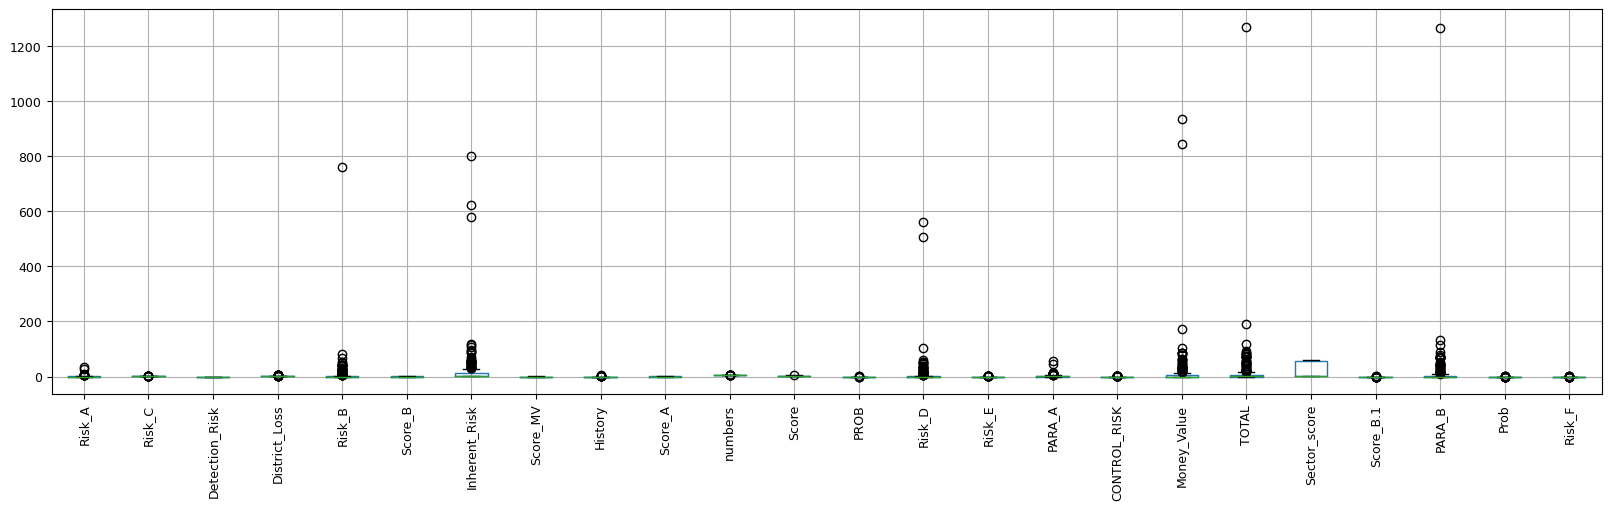

In [82]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()

Para proceder con las outliers y no afectar de forma significativa el set de datos, filtramos por los valores que son arriba de 150. 
Vemos que la columna 2 (Inherent_Risk) tiene 3 observaciones con estas características:

In [83]:
def filter_gt_umbral(array, umbral):
    '''
    greater than umbral
    '''
    return [element for element in array if element > umbral]

# Eliminación de outliers. Vamos primero por los valores arriba de 200
umbral = 150
outliers = [filter_gt_umbral(flier.get_ydata(),umbral)  for flier in boxplot_dict["fliers"]]
outliers

[[],
 [],
 [],
 [],
 [758.778],
 [],
 [577.508, 801.262, 622.838],
 [],
 [],
 [],
 [],
 [],
 [],
 [561.018, 506.622],
 [],
 [],
 [],
 [935.03, 173.02, 844.37],
 [1268.91, 191.36],
 [],
 [],
 [1264.63],
 [],
 []]

In [84]:
outliers_inherent_risk = outliers[6]
df_train = df_train[~df_train.Inherent_Risk.isin(outliers_inherent_risk)]
# Resetear indices para evitar problemas en el PCA
df_train = df_train.reset_index(drop=True)
df_train.describe(include='all')

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
count,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,...,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.000000,198.0,198.000000
mean,23.102778,2.146619,0.340404,1.165425,8.720952,0.317172,5.099221,10.847621,5.053030,0.220202,...,0.207071,0.494949,0.090909,0.215152,0.043434,2.683838,13.031612,0.538384,0.5,4.281237
std,25.514302,4.245281,0.171833,2.584356,19.967242,0.172200,12.018606,21.939335,0.184325,0.066805,...,0.046725,0.241557,0.441293,0.060226,0.245016,0.837958,23.103234,0.355438,0.0,8.872283
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000
25%,2.370000,0.217500,0.200000,0.043500,0.000000,0.200000,0.000000,0.490000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.000000,1.557500,0.400000,0.5,0.311500
50%,3.890000,0.780000,0.200000,0.156000,0.425000,0.200000,0.085000,1.260000,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,2.200000,2.207000,0.400000,0.5,0.511200
75%,55.570000,2.297500,0.600000,1.378500,3.497500,0.400000,1.741500,5.997500,5.000000,0.200000,...,0.200000,0.400000,0.000000,0.200000,0.000000,3.200000,11.431500,0.400000,0.5,2.826300
max,59.850000,45.230000,0.600000,27.138000,113.970000,0.600000,68.382000,117.080000,6.500000,0.600000,...,0.600000,1.200000,5.000000,0.600000,3.000000,4.800000,118.850000,3.400000,0.5,52.012000


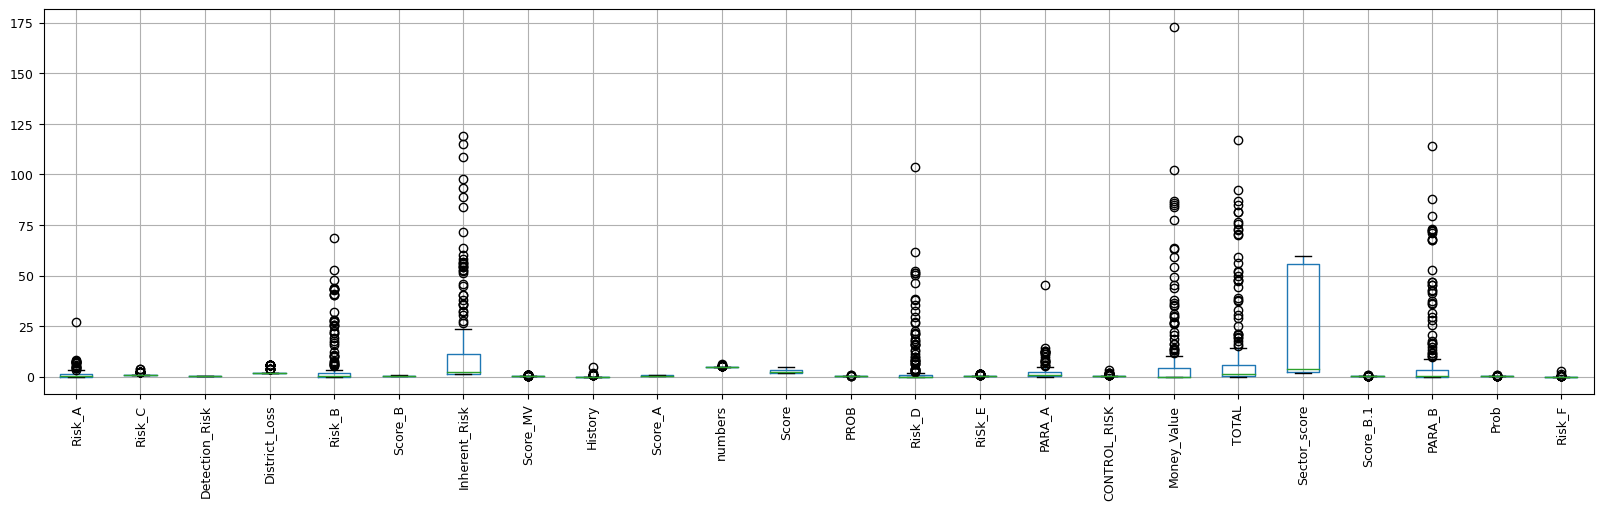

In [85]:
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()

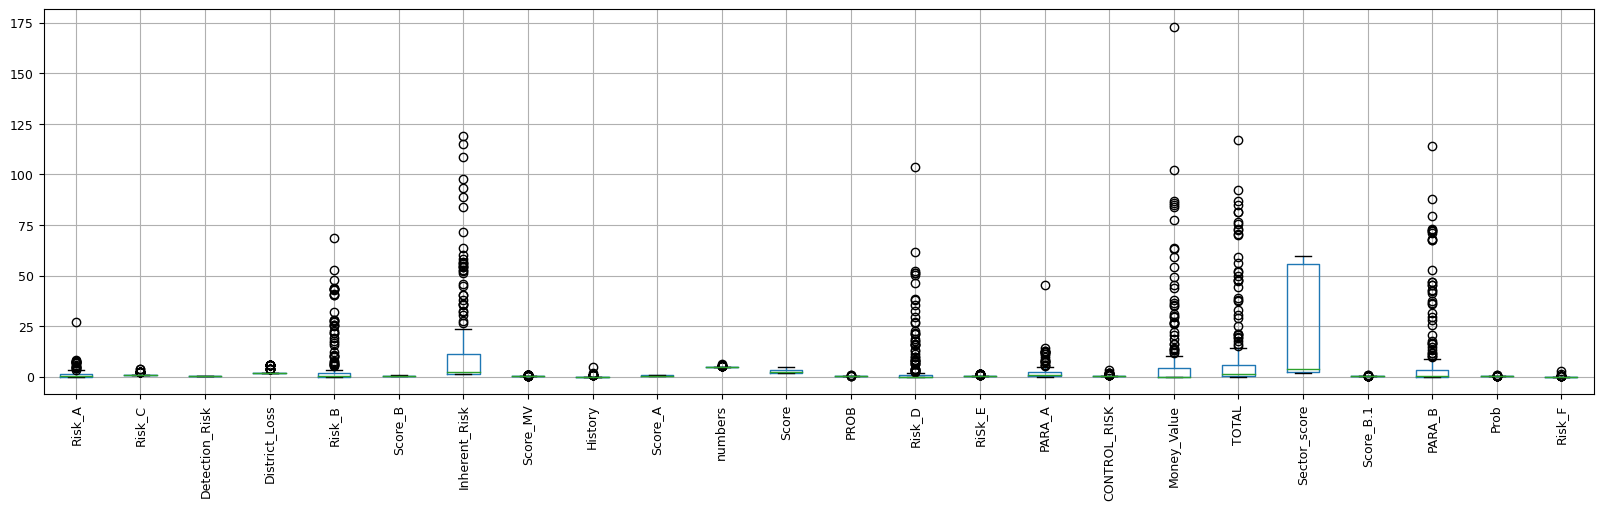

In [86]:
# Aún parecen quedar outliers en Money_Value. Repetimos el proceso, ahora con esa columna. 
outliers_money_value = outliers[18] # El Id de money manager puede variar
df_train = df_train[~df_train.Money_Value.isin(outliers_money_value)]
# Resetear indices para evitar problemas en el PCA
df_train = df_train.reset_index(drop=True)
axes, boxplot_dict = pd.DataFrame.boxplot(df_train[x_column_names], return_type='both', fontsize=9, figsize=(20,5), rot=90)
plt.show()


La escala sigue siendo un problema, a continuación se aborda primero los resultados del modelo sin escalar y luego el escalamiento. 

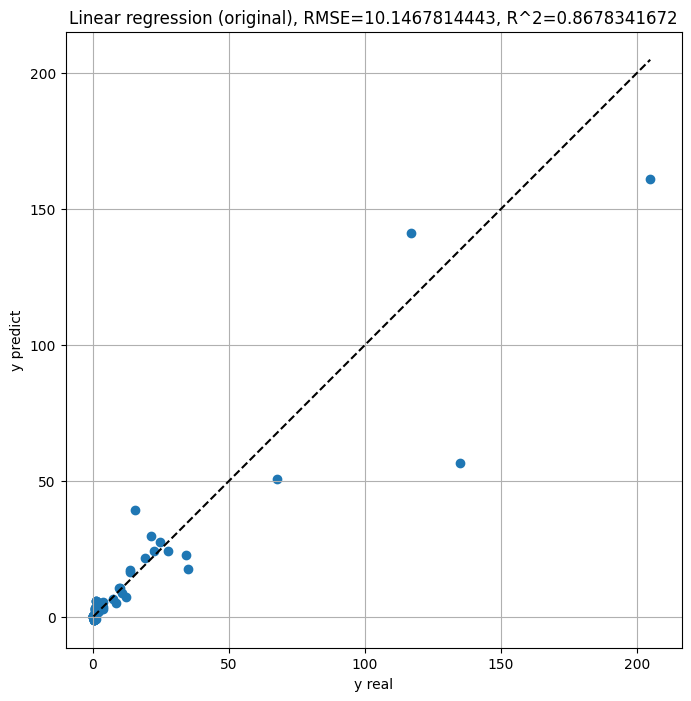

In [71]:
linreg_train = LinearRegression()
linreg_train.fit(df_train[x_column_names],np.array(df_train[y_column_name]))
draw_lm_results(np.array(df_test[y_column_name]), df_test[x_column_names], linreg_train)

# Sesgo
En este punto, tenemos un buen performance del modelo. Sin embargo, un análisis exploratorio más profundo podría llevar a un desempeño. Comencemos por revisar el sesgo. 

La skew nos indica que las variables con sesgo positivo son: todas excepto Sector_score y Score_A.

Por este motivo se intentará una transformación logaritmica para ver el comportamiento.

In [98]:
sesgo = df_test.skew()
sesgo[sesgo < 1]

Sector_score      0.871268
Score_A           0.411935
Detection_Risk    0.000000
dtype: float64

In [43]:
# Obtenemos el nombre de las columnas con sesgo positivo
columns_skew = sesgo[sesgo > 1].index.tolist()
columns_skew

['PARA_A',
 'Risk_A',
 'PARA_B',
 'Score_B',
 'Risk_B',
 'TOTAL',
 'numbers',
 'Score_B.1',
 'Risk_C',
 'Money_Value',
 'Score_MV',
 'Risk_D',
 'District_Loss',
 'PROB',
 'RiSk_E',
 'History',
 'Prob',
 'Risk_F',
 'Score',
 'Inherent_Risk',
 'CONTROL_RISK',
 'Audit_Risk']

In [46]:
# Train y test con transformación logaritmica
df_test_l=df_test[x_column_names].copy()
df_test_l[columns_skew] = np.log10(df_test[columns_skew]-df_test[columns_skew].min()+1)
df_test_l.skew()

Risk_A            1.740921
Risk_C            3.053787
Detection_Risk    0.000000
District_Loss     1.641744
Risk_B            1.780342
Score_B           0.964845
Inherent_Risk     1.361969
Score_MV          1.463176
History           4.197615
Score_A           0.411935
numbers           3.939402
Score             0.755143
PROB              9.949874
Risk_D            1.980232
RiSk_E            1.693486
PARA_A            1.323282
CONTROL_RISK      2.186721
Money_Value       1.724325
TOTAL             1.104586
Sector_score      0.871268
Score_B.1         3.030849
PARA_B            1.496925
Prob              3.942592
Risk_F            4.915537
Audit_Risk        1.709860
dtype: float64

In [47]:
# Train y test con transformación logaritmica
df_train_l=df_train[x_column_names].copy()
df_train_l[columns_skew] = np.log10(df_train[columns_skew]-df_train[columns_skew].min()+1)
df_train_l.skew()

Risk_A            1.682277
Risk_C            3.061418
Detection_Risk    0.000000
District_Loss     2.416945
Risk_B            1.697935
Score_B           0.826569
Inherent_Risk     1.148944
Score_MV          1.243342
History           4.471091
Score_A           0.573502
numbers           3.422925
Score             0.618764
PROB              7.026337
Risk_D            1.772268
RiSk_E            2.224792
PARA_A            1.271825
CONTROL_RISK      2.518697
Money_Value       1.470158
TOTAL             1.216712
Sector_score      0.542164
Score_B.1         3.205508
PARA_B            1.461877
Prob              4.010488
Risk_F            6.062482
Audit_Risk        1.742729
dtype: float64

Como se ve a continuación, transformación logarítmica no funciona para este conjunto de datos

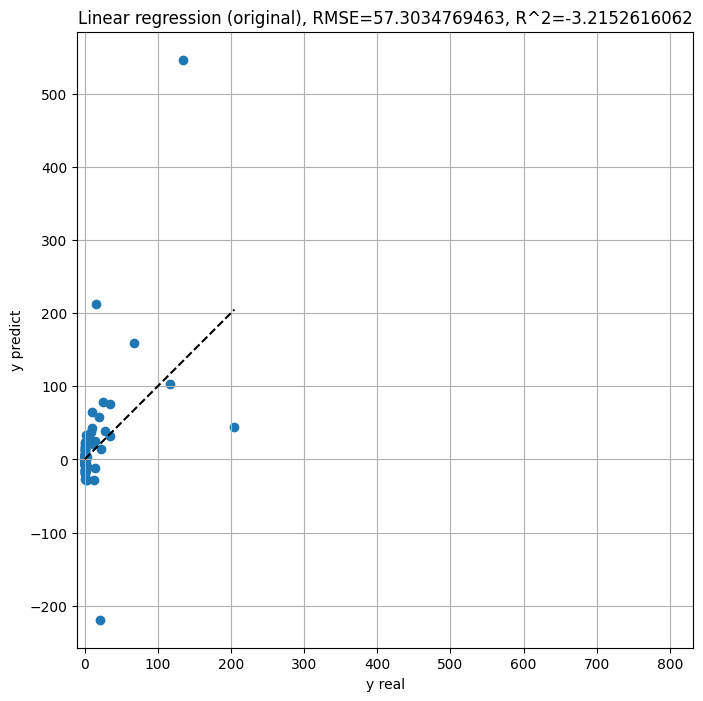

In [49]:
linreg_train_l = LinearRegression()
linreg_train_l.fit(df_train_l[x_column_names],np.array(df_train[y_column_name]))
draw_lm_results(np.array(df_test[y_column_name]), df_test_l[x_column_names], linreg_train_l)

# Predicción conjunto de datos de variable objetivo desconocida. 

In [73]:
df_unknown

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk
index,,,,,,,,,,,,,,,,,,,,,
300,55.57,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5
301,3.41,1.15,0.4,0.460,20.10,0.6,12.060,21.25,6.0,0.6,...,2,0.2,0.4,0,0.2,0.0,4.6,29.390,0.4,0.5
302,2.37,3.42,0.6,2.052,10.55,0.6,6.330,13.97,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,3.8,12.566,0.4,0.5
303,55.57,0.68,0.2,0.136,1.47,0.4,0.588,2.15,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.6,2.124,0.4,0.5
304,55.57,0.75,0.2,0.150,0.45,0.2,0.090,1.20,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,1.640,0.4,0.5
305,1.99,0.77,0.2,0.154,0.00,0.2,0.000,0.77,5.0,0.2,...,4,0.2,0.8,0,0.2,0.0,2.2,1.954,0.8,0.5
306,2.37,1.07,0.4,0.428,0.59,0.2,0.118,1.66,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.2,1.946,0.4,0.5
307,3.89,0.00,0.2,0.000,1.10,0.2,0.220,1.10,5.0,0.2,...,6,0.2,1.2,0,0.2,0.0,2.4,2.420,1.2,0.5
308,59.85,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,...,2,0.2,0.4,0,0.2,0.0,2.0,2.060,0.4,0.5


In [120]:
predicciones = linreg_train.predict(df_unknown[x_column_names])
df_predicciones = pd.DataFrame(predicciones)
df_predicciones.head()

,0
0,0.374451
1,2.707267
2,1.460888
3,-0.062904
4,0.083366


In [123]:
df_unknown = df_unknown.reset_index(drop=True)
df_unknown['Audit_risk'] = df_predicciones[0]
df_unknown.to_csv('Unknown dataset.csv', index=False)